# No Shot Learning Demonstration

Blaine Perry  
Jarek Ingros  
Blain Kuehnert  
Jonathan Dencker  

COA: 18 August 2022

## Notebook Setup

###  Environment

In [1]:
# --- IMPORTS --- # 
import os
import shutil
import numpy as np
from icrawler.builtin import GoogleImageCrawler
import logging
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from evaluation import eval

# --- Display Settings --- #
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 200

# --- Log Settings --- #
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

### Helper Functions

In [2]:
def showImage(search_word, image_dir, eval = False, idx = 0):
    dir_pointer = image_dir + r'eval/' if eval else image_dir
    image = os.listdir(dir_pointer)[idx]
    path = dir_pointer + image
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.title(search_word)
    plt.show()
        
def getGoogleImage(search_word, directory, num_pics = 1):
    google_Crawler = GoogleImageCrawler(storage = {"root_dir" : directory})
    print('Retrieving Google Image Results For "{search_word}" "')
    google_Crawler.crawl(keyword = search_word, max_num = num_pics)
        
# def getUserInputs():
#     word_list = []
#     for i in range(4)
#         this_word = input('Enter Search Word:')
#         word_list.append(this_word)
#     return word_list

def getUserInput():
    this_word = input('Enter Search Word:')
    return this_word

def getItemList(word_list):
    this_word = ' '
    while(True):
        this_word = input('Enter an object you see:')
        if this_word == 'exit':
            break
        else:
            word_list.append(this_word)
    return word_list

In [3]:
def no_shot_google_images():
    
    print('Creating directory to store images...')
    !mkdir test_images
    %cd test_images
    !mkdir eval
    %cd .. 

    image_dir = r'./test_images/'
    
    while(True):
    
        word = input('Enter Search Word:')
        if word == 'exit':
            break
        else:
            getGoogleImage(word, image_dir)
            showImage(word, image_dir)

            word_list = []
            item_list = getItemList(word_list)
            
            print('Loading default background classes...')

            background_classes = ['flag', 'sand', 'street', 'grass', 'dirt road', 'rock', 'water', 'tree', 'waves'] 
            
            print('Loading Model...')

            WEIGHTS_NAME='../CLIP-RPN_rpn_full_training_epoch_30.pth'

            eval(item_list, 
                 background_classes, 
                 rpn_score_thresh = .05, 
                 iou_thresh=.2, 
                 conf_thresh=.4, 
                 MODEL_TYPE = 'CLIP-RPN', 
                 WEIGHTS_NAME=WEIGHTS_NAME, 
                 image_dir=image_dir, 
                 weighted_bboxes=True, 
                 eps=35, 
                 show_predictions=False)

            showImage(word, image_dir, eval = True)
    
    shutil.rmtree('test_images')

In [9]:
def no_shot_series(google = True, path_to_imagery = None):
    if not google:
        print('Loading image directory...')
        img_dir = path_to_imagery
    else:
        
        print('Creating directory to store images...')
        
        !mkdir test_images
        %cd test_images
        !mkdir eval
        %cd .. 
        
        image_dir = r'./test_images/'
        
        word = input('Describe a landscape: ')
        num_pics = -1
        while num_pics <= 0:
            num_pics = input('How many images would you like to scan: ')
            try:
                num_pics = int(num_pics)
                break
            except:
                print('Please enter a valid integer greater than 0')
                num_pics = -1
                
        getGoogleImage(word, image_dir, num_pics = num_pics)
        showImage(word, image_dir, eval = False)
        rand_pic_idx = np.random.randint(0,num_pics)
        showImage(word, image_dir, eval = False, idx = rand_pic_idx)
        
        search_object = input("What object should we look for in this imagery? ")
        
        print('Loading Default Background Classes...')
        background_classes = ['flag', 'sand', 'street', 'grass', 'dirt road', 'rock', 'water', 'tree', 'waves'] 

        print('Loading Model...')
        WEIGHTS_NAME='../CLIP-RPN_rpn_full_training_epoch_30.pth'

        eval([search_object], 
             background_classes, 
             rpn_score_thresh = .05, 
             iou_thresh=.2, 
             conf_thresh=.4, 
             MODEL_TYPE = 'CLIP-RPN', 
             WEIGHTS_NAME=WEIGHTS_NAME, 
             image_dir=image_dir, 
             weighted_bboxes=True, 
             eps=35, 
             show_predictions=False)
        
        showImage(search_object, image_dir, eval = True)
        showImage(search_object, image_dir, eval = True, idx = rand_pic_idx)

        shutil.rmtree('test_images')

## Demonstrations

### Identify Objects on an Untrained Image from Google Images

Creating directory to store images...
C:\Users\Jonathan\Documents\2. CMU\NoShot_Model_Repo\TORCH_CLIP_FRCNN_Trainable\test_images


A subdirectory or file test_images already exists.
A subdirectory or file eval already exists.


C:\Users\Jonathan\Documents\2. CMU\NoShot_Model_Repo\TORCH_CLIP_FRCNN_Trainable
Enter Search Word:Soldier


2022-08-18 11:49:22,279 - INFO - icrawler.crawler - start crawling...
2022-08-18 11:49:22,280 - INFO - icrawler.crawler - starting 1 feeder threads...
2022-08-18 11:49:22,283 - INFO - feeder - thread feeder-001 exit
2022-08-18 11:49:22,285 - INFO - icrawler.crawler - starting 1 parser threads...
2022-08-18 11:49:22,288 - INFO - icrawler.crawler - starting 1 downloader threads...


Retrieving Google Image Results For "{search_word}" "


2022-08-18 11:49:23,067 - INFO - parser - parsing result page https://www.google.com/search?q=Soldier&ijn=0&start=0&tbs=&tbm=isch
2022-08-18 11:49:23,111 - INFO - downloader - skip downloading file 000001.jpg
2022-08-18 11:49:23,422 - INFO - downloader - downloaded images reach max num, thread downloader-001 is ready to exit
2022-08-18 11:49:23,423 - INFO - downloader - thread downloader-001 exit
2022-08-18 11:49:24,304 - INFO - icrawler.crawler - Crawling task done!
2022-08-18 11:49:25,124 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2022-08-18 11:49:25,125 - INFO - parser - thread parser-001 exit


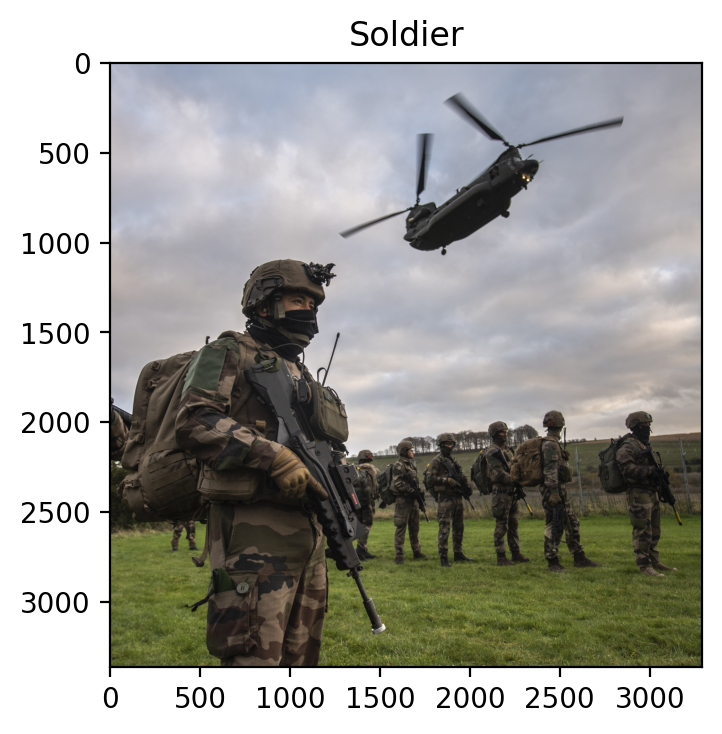

Enter an object you see:Rifle
Enter an object you see:Helicopter
Enter an object you see:Glove
Enter an object you see:Helmet/
Enter an object you see:Boot
Enter an object you see:exit
Loading default background classes...
Loading Model...
loaded checkpoint at epoch 30


2022-08-18 11:50:19,285 - INFO - numexpr.utils - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-08-18 11:50:19,286 - INFO - numexpr.utils - NumExpr defaulting to 8 threads.


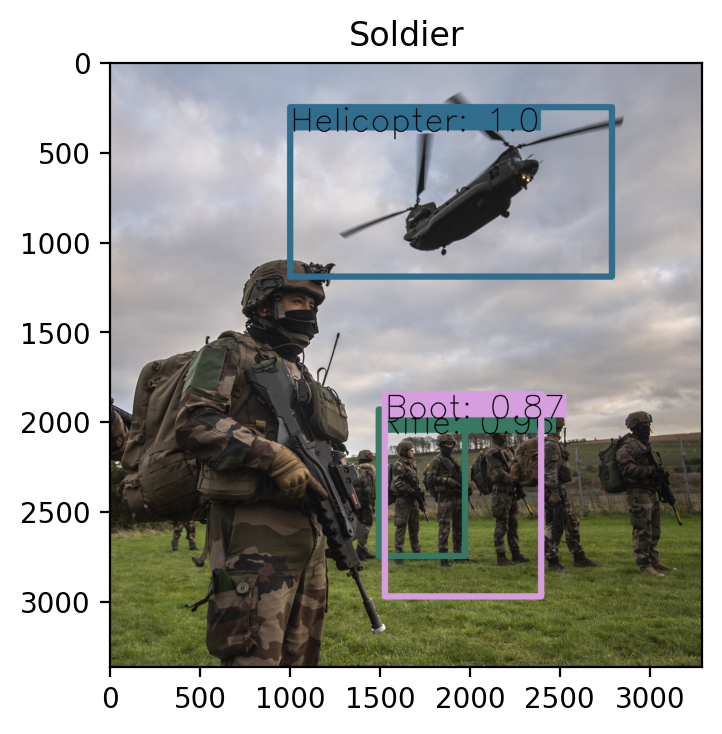

Enter Search Word:exit


In [5]:
no_shot_google_images()

### Identify an Object of Interest in a Series of Images

Creating directory to store images...
C:\Users\Jonathan\Documents\2. CMU\NoShot_Model_Repo\TORCH_CLIP_FRCNN_Trainable\test_images


A subdirectory or file test_images already exists.
A subdirectory or file eval already exists.


C:\Users\Jonathan\Documents\2. CMU\NoShot_Model_Repo\TORCH_CLIP_FRCNN_Trainable
Describe a landscape: airport
How many images would you like to scan: 10


2022-08-18 11:55:06,326 - INFO - icrawler.crawler - start crawling...
2022-08-18 11:55:06,327 - INFO - icrawler.crawler - starting 1 feeder threads...
2022-08-18 11:55:06,328 - INFO - feeder - thread feeder-001 exit
2022-08-18 11:55:06,331 - INFO - icrawler.crawler - starting 1 parser threads...
2022-08-18 11:55:06,332 - INFO - icrawler.crawler - starting 1 downloader threads...


Retrieving Google Image Results For "{search_word}" "


2022-08-18 11:55:06,965 - INFO - parser - parsing result page https://www.google.com/search?q=airport&ijn=0&start=0&tbs=&tbm=isch
2022-08-18 11:55:07,010 - INFO - downloader - skip downloading file 000001.jpg
2022-08-18 11:55:07,012 - INFO - downloader - skip downloading file 000002.jpg
2022-08-18 11:55:07,013 - INFO - downloader - skip downloading file 000003.jpg
2022-08-18 11:55:07,014 - INFO - downloader - skip downloading file 000004.jpg
2022-08-18 11:55:07,015 - INFO - downloader - skip downloading file 000005.jpg
2022-08-18 11:55:07,017 - INFO - downloader - skip downloading file 000006.jpg
2022-08-18 11:55:07,019 - INFO - downloader - skip downloading file 000007.jpg
2022-08-18 11:55:07,020 - INFO - downloader - skip downloading file 000008.jpg
2022-08-18 11:55:07,022 - INFO - downloader - skip downloading file 000009.jpg
2022-08-18 11:55:07,024 - INFO - downloader - skip downloading file 000010.jpg
2022-08-18 11:55:07,205 - INFO - downloader - downloaded images reach max num, t

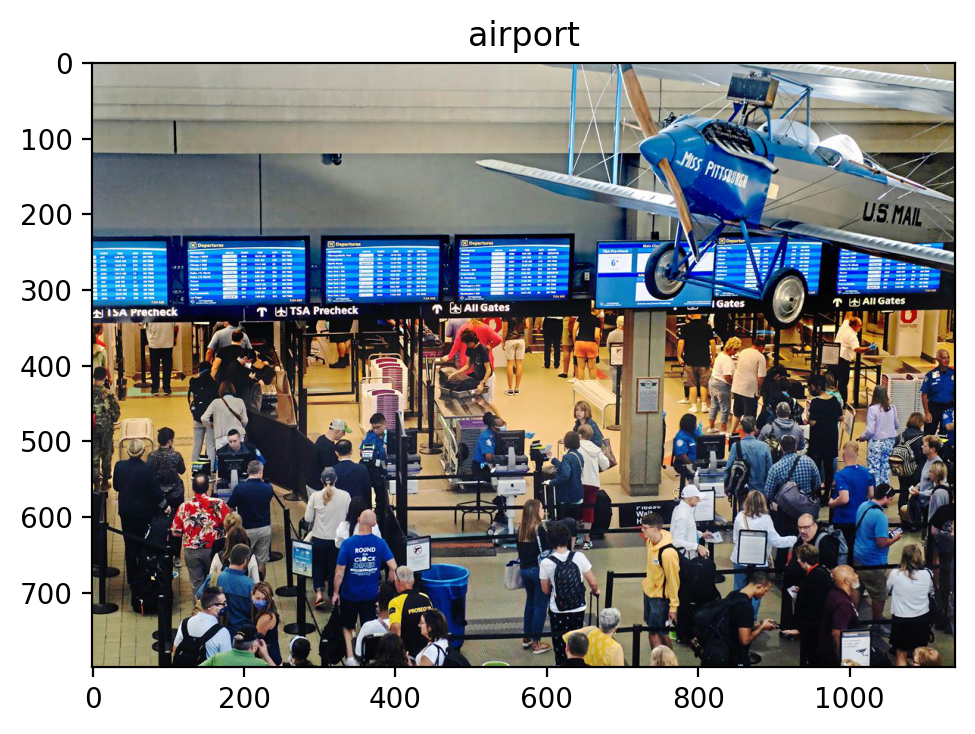

2022-08-18 11:55:08,032 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2022-08-18 11:55:08,033 - INFO - parser - thread parser-001 exit


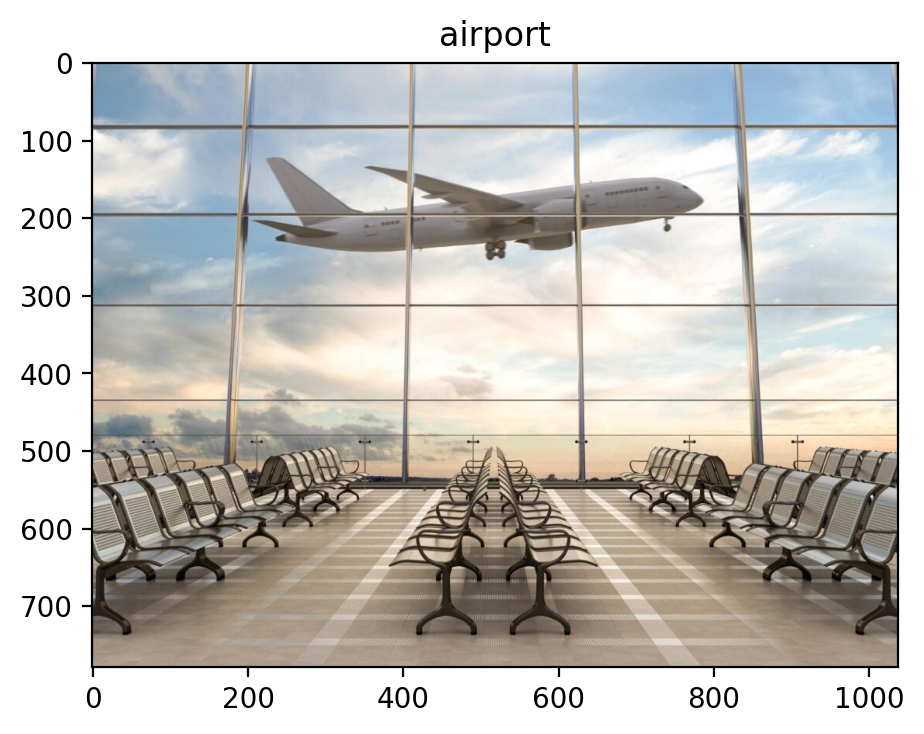

What object should we look for in this imagery? airplane
Loading Default Background Classes...
Loading Model...
loaded checkpoint at epoch 30


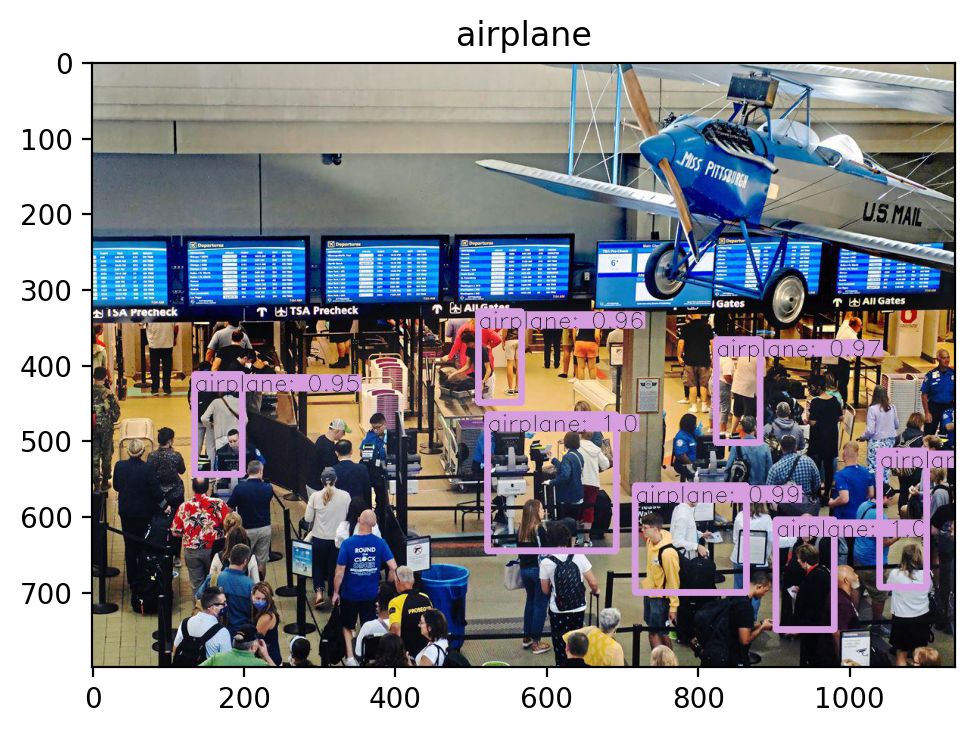

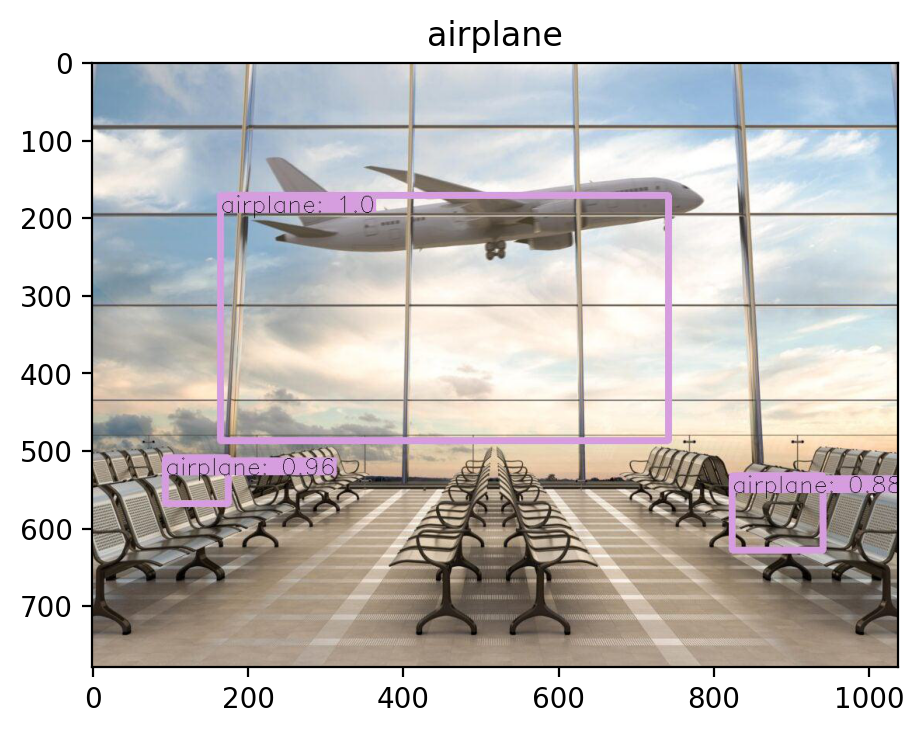

In [10]:
no_shot_series()